In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as pl

In [2]:
# read dataset

dataset_Udata = pd.read_csv('ml-100k/u.data', sep='\t', header=None)
dataset_Udata.columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
dataset_Udata

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
dataset_Ugenre = pd.read_csv('ml-100k/u.genre', sep='|', header=None)
dataset_Ugenre.columns = ['genre', 'genre_id']


In [5]:
dataset_Ugenre

,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [6]:
dataset_Uitem = pd.read_csv('ml-100k/u.item', sep='|', header=None, encoding='latin-1')
dataset_Uitem.columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [7]:
dataset_Uitem.drop(columns=['video_release_date', 'IMDb_URL'], inplace=True)
dataset_Uitem

,item_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# user id | age | gender | occupation | zip code
dataset_Uuser = pd.read_csv('ml-100k/u.user', sep='|', header=None)
dataset_Uuser.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
dataset_Uuser.drop(columns=['zip_code'], inplace=True)

In [9]:
dataset_Uuser

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


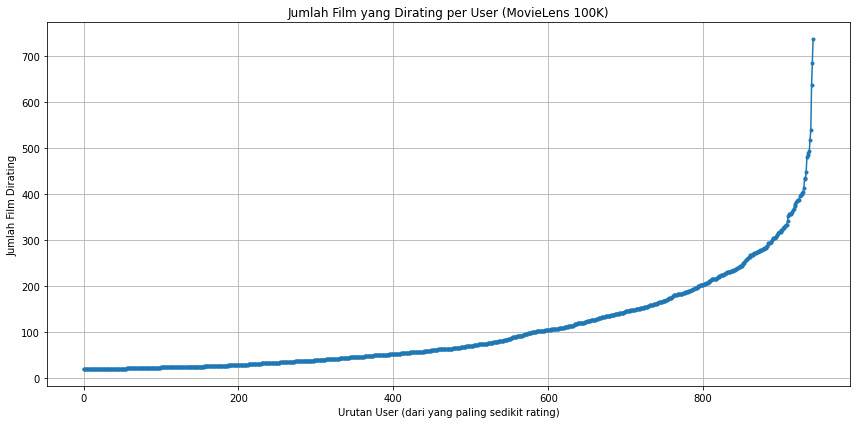

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data rating
df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Hitung jumlah film yang dirating per user, dari paling sedikit ke paling banyak
user_rating_counts = df.groupby('user_id').size().sort_values(ascending=True).reset_index()
user_rating_counts.columns = ['user_id', 'rating_count']

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(user_rating_counts)), user_rating_counts['rating_count'], marker='o', linestyle='-', markersize=3)
plt.title('Jumlah Film yang Dirating per User (MovieLens 100K)')
plt.xlabel('Urutan User (dari yang paling sedikit rating)')
plt.ylabel('Jumlah Film Dirating')
plt.grid(True)
plt.tight_layout()
plt.savefig('eda_Img/jumlah_rating_per_user_sorted.png')
plt.show()


In [17]:
#export png

exportFig1 = pl.savefig('fig1.png')


<Figure size 432x288 with 0 Axes>

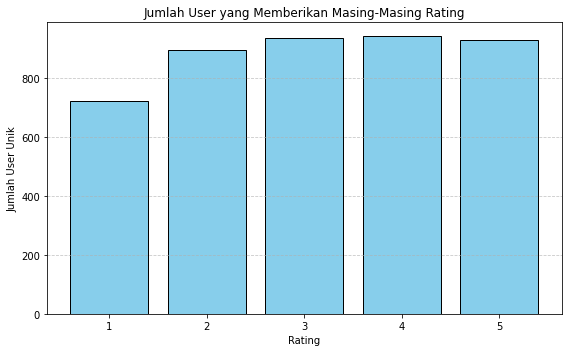

In [21]:
# Untuk setiap rating (1-5), hitung berapa user unik yang pernah memberikan rating tersebut
rating_user_counts = df.groupby('rating')['user_id'].nunique()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rating_user_counts.index, rating_user_counts.values, color='skyblue', edgecolor='black')
plt.title('Jumlah User yang Memberikan Masing-Masing Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah User Unik')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('eda_Img/jumlahUser rating.png')
plt.show()

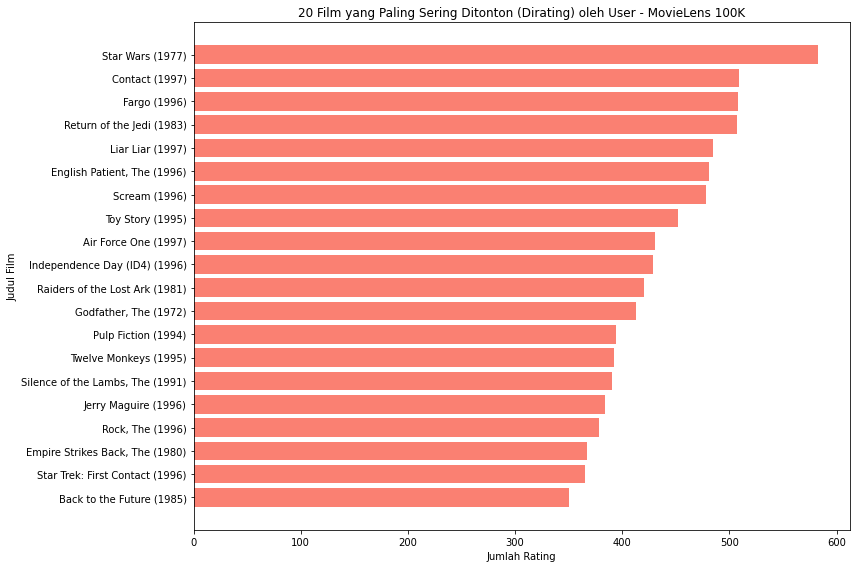

In [22]:
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['movie_id', 'title'])

# Hitung berapa kali setiap movie_id muncul (berapa banyak user yang menonton/rating)
top_movies = df['movie_id'].value_counts().head(20).reset_index()
top_movies.columns = ['movie_id', 'rating_count']

# Gabungkan dengan nama film
top_movies = top_movies.merge(movies, on='movie_id')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_movies['title'], top_movies['rating_count'], color='salmon')
plt.gca().invert_yaxis()  # Supaya ranking tertinggi di atas
plt.title('20 Film yang Paling Sering Ditonton (Dirating) oleh User - MovieLens 100K')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.tight_layout()
plt.savefig('eda_Img/topItem.png')
plt.show()